# Predicción de Precios de Vivienda

En este proyecto, utilizaremos un conjunto de datos históricos de ventas de viviendas para realizar predicciones sobre el precio de las propiedades. El objetivo es analizar las tendencias del mercado inmobiliario y desarrollar un modelo predictivo que nos permita estimar el valor de una vivienda en función de diversas características.

### Objetivos del Proyecto
1. **Análisis Exploratorio de Datos (EDA)**: Examinar y visualizar los datos para identificar patrones y relaciones significativas.
2. **Preprocesamiento de Datos**: Limpiar y preparar los datos para el análisis y modelado.
3. **Desarrollo del Modelo Predictivo**: Utilizar técnicas de machine learning para entrenar y validar un modelo que prediga los precios de las viviendas.
4. **Evaluación del Modelo**: Medir la precisión y eficacia del modelo utilizando métricas apropiadas.
5. **Implementación y Visualización**: Crear visualizaciones que ayuden a comunicar los resultados de manera clara y efectiva.

A continuación, cargaremos los datos y comenzaremos con el análisis exploratorio.

In [22]:
from google.colab import drive
import pandas as pd

# Conectar Google Colab con tu Google Drive
drive.mount('/content/drive')

# Ruta al archivo CSV en tu Google Drive
file_path = '/content/drive/MyDrive/csv_final.csv'

# Leer el archivo CSV con pandas
df = pd.read_csv(file_path)

# Ver las primeras filas del dataframe
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/8198-Uphill...,NaN,18000000,2435.0,Not specified,4,3,5470,NaN,SINGLE_FAMILY,...,CA,USA,AKGRE Inc,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/4757-Avenid...,223200.0,399990,1786.0,Not specified,2,3,1056,NaN,SINGLE_FAMILY,...,CA,USA,Champion Realty,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/61018-Presc...,568947.0,575000,2300.0,Not specified,2,3,1577,NaN,SINGLE_FAMILY,...,CA,USA,BHG Desert Lifestyle Properties,VERDADERO,VERDADERO,VERDADERO,FALSO,For Sale (Broker),House for sale,FOR_SALE
3,https://www.zillow.com/homedetails/61875-Anaco...,851656.0,899000,4798.0,Not specified,2,3,1434,NaN,SINGLE_FAMILY,...,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
4,https://www.zillow.com/homedetails/61879-Petun...,NaN,369900,1825.0,Not specified,1,3,1040,NaN,SINGLE_FAMILY,...,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE


### Carga de Datos y Exploración Inicial
Para comenzar nuestro análisis, primero hemos cargado el archivo CSV que contiene los datos históricos de ventas de viviendas. Utilizamos el comando `head(5)` para visualizar las primeras cinco filas del dataset, lo que nos permite echar un vistazo inicial a los datos y verificar que se han cargado correctamente.
A continuación, ejecutamos `df.info()` para obtener una visión general de la estructura del DataFrame. Este comando nos proporciona información valiosa sobre el número de entradas, el tipo de datos de cada columna y si hay valores nulos. Este paso es crucial para identificar y eliminar columnas irrelevantes o redundantes que no aporten valor a nuestro análisis.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Url             353 non-null    object 
 1   Zestimate       321 non-null    float64
 2   Price           353 non-null    int64  
 3   Rent Zestimate  330 non-null    float64
 4   Days On Zillow  353 non-null    object 
 5   Bathrooms       353 non-null    int64  
 6   Bedrooms        353 non-null    int64  
 7   Living Area     353 non-null    int64  
 8   Lot Size        0 non-null      float64
 9   Home Type       353 non-null    object 
 10  Street Address  353 non-null    object 
 11  City            353 non-null    object 
 12  Zip             353 non-null    int64  
 13  State           353 non-null    object 
 14  Country         353 non-null    object 
 15  Broker Name     330 non-null    object 
 16  Has 3D Model    353 non-null    object 
 17  Has Image       353 non-null    obj

### Selección de Columnas Relevantes

Para asegurar que nuestro modelo predictivo sea preciso y manejable, hemos decidido enfocarnos en las columnas más relevantes para nuestro análisis. Nos quedaremos con las siguientes columnas:

- **Price**: El precio de venta de la vivienda.
- **Bathrooms**: El número de baños en la vivienda.
- **Bedrooms**: El número de habitaciones en la vivienda.
- **Living Area**: El área habitable de la vivienda en metros cuadrados (o pies cuadrados).
- **Home Type**: El tipo de vivienda (por ejemplo, apartamento, casa unifamiliar, etc.).
- **City**: La ciudad en la que se encuentra la vivienda.
- **Zip**: El código postal de la ubicación de la vivienda.
- **State**: El estado en el que se encuentra la vivienda.
- **Country**: El país en el que se encuentra la vivienda.

Estas columnas nos proporcionarán la información esencial necesaria para construir un modelo que pueda predecir el precio de las viviendas con base en las características más influyentes. A continuación, eliminamos las columnas innecesarias y preparamos nuestros datos para el análisis.




In [24]:
#Vamos a quedarnos con las columnas que queremos

columns_to_keep = [
    "Price", "Bathrooms", "Bedrooms",
    "Living Area", "Home Type",
    "City", "Zip", "State", "Country"
]

# Filtrar solo las columnas necesarias
filtered_df = df[columns_to_keep]

# Mostrar las primeras filas del nuevo DataFrame
print(filtered_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        353 non-null    int64 
 1   Bathrooms    353 non-null    int64 
 2   Bedrooms     353 non-null    int64 
 3   Living Area  353 non-null    int64 
 4   Home Type    353 non-null    object
 5   City         353 non-null    object
 6   Zip          353 non-null    int64 
 7   State        353 non-null    object
 8   Country      353 non-null    object
dtypes: int64(5), object(4)
memory usage: 24.9+ KB
None


### Análisis Exploratorio de Datos (EDA)

El siguiente paso en nuestro proyecto es realizar un Análisis Exploratorio de Datos (EDA). Este proceso nos permite comprender mejor las características de nuestro conjunto de datos, identificar patrones y detectar cualquier anomalía que pueda estar presente.

### Información Básica de los Datos

Para empezar, obtenemos una visión general de nuestro DataFrame con las columnas seleccionadas. Esto incluye estadísticas descriptivas y una descripción general de cada columna, como el tipo de dato y la cantidad de valores nulos. Esta información es crucial para entender la estructura de los datos y planificar los siguientes pasos del análisis.




In [25]:
# Resumen de los datos
print(filtered_df.info())

print('-'*100)

# Estadísticas descriptivas de las columnas numéricas
print(filtered_df.describe())

print('-'*100)

# Verificar valores únicos en las columnas categóricas
for col in ["Home Type", "City", "State", "Country"]:
    print(f"{col}: {filtered_df[col].nunique()} valores únicos")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        353 non-null    int64 
 1   Bathrooms    353 non-null    int64 
 2   Bedrooms     353 non-null    int64 
 3   Living Area  353 non-null    int64 
 4   Home Type    353 non-null    object
 5   City         353 non-null    object
 6   Zip          353 non-null    int64 
 7   State        353 non-null    object
 8   Country      353 non-null    object
dtypes: int64(5), object(4)
memory usage: 24.9+ KB
None
----------------------------------------------------------------------------------------------------
              Price   Bathrooms    Bedrooms  Living Area           Zip
count  3.530000e+02  353.000000  353.000000   353.000000    353.000000
mean   8.447353e+05    2.657224    3.473088  2074.951841  92291.535411
std    1.087714e+06    1.145054    0.825713  1013.150142     24.301247
min 

### Análisis Univariable de Variables Numéricas
El siguiente paso en nuestro análisis es el análisis univariable de las variables numéricas. Este análisis nos permite comprender la distribución de cada variable individualmente, identificando patrones, tendencias y posibles outliers.

Distribución de Precios
Comenzamos con un histograma que muestra la distribución de los precios de venta de las viviendas. Este gráfico nos ayuda a visualizar cómo se distribuyen los precios y a identificar cualquier asimetría o concentración de valores.

Utilizamos un diagrama de caja para visualizar la distribución del área habitable de las viviendas. Este gráfico nos permite identificar valores atípicos y entender mejor la dispersión de las áreas habitables.

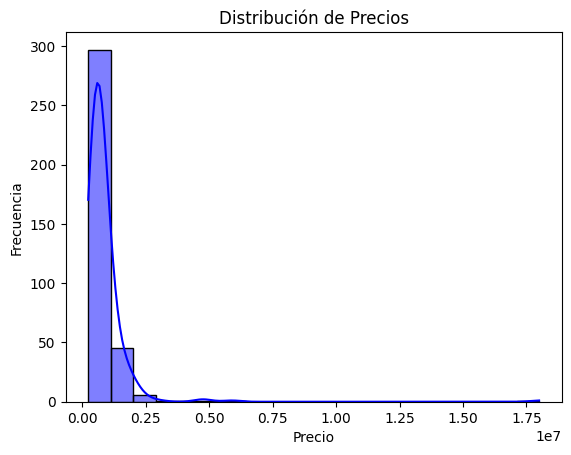

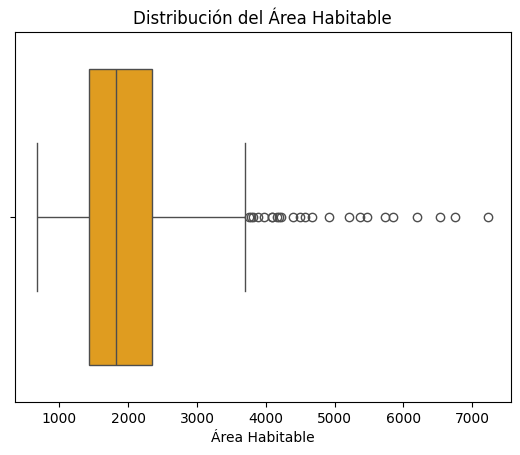

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de precios
sns.histplot(filtered_df["Price"], kde=True, bins=20, color='blue')
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de áreas habitables
sns.boxplot(x=filtered_df["Living Area"], color='orange')
plt.title("Distribución del Área Habitable")
plt.xlabel("Área Habitable")
plt.show()


### Análisis Univariable de Variables Categóricas
Ahora realizaremos un análisis univariable de las variables categóricas. Esto incluye examinar la frecuencia de cada categoría y visualizar los datos con gráficos de barras.

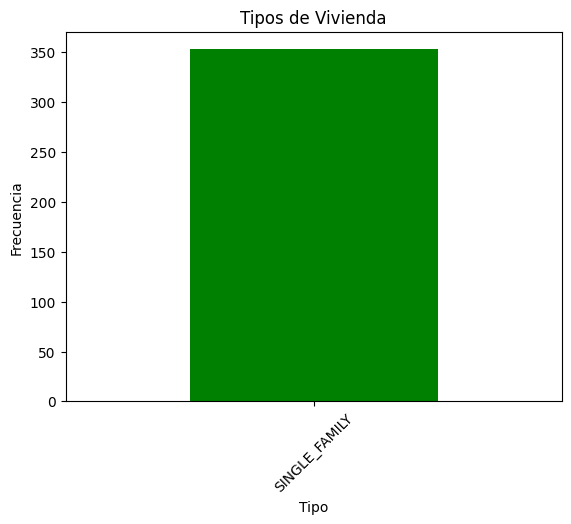

In [27]:
# Frecuencia de tipos de vivienda
filtered_df["Home Type"].value_counts().plot(kind='bar', color='green')
plt.title("Tipos de Vivienda")
plt.xlabel("Tipo")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


### Análisis Bivariado:
Relación entre Precio y Área Habitable
Para entender cómo se relacionan el precio de venta de las viviendas y el área habitable, utilizamos un gráfico de dispersión (scatterplot). Este gráfico nos permitirá visualizar si existe alguna correlación entre estas dos variables.

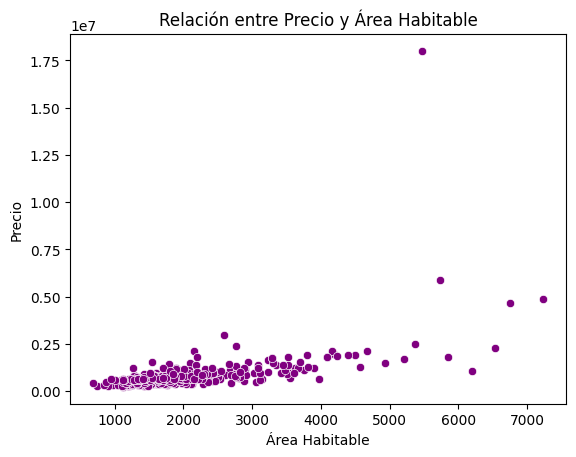

In [28]:
# Scatterplot
sns.scatterplot(x="Living Area", y="Price", data=filtered_df, color='purple')
plt.title("Relación entre Precio y Área Habitable")
plt.xlabel("Área Habitable")
plt.ylabel("Precio")
plt.show()


*Precio por Tipo de Vivienda:*

Utilizamos un diagrama de caja para visualizar la distribución de los precios de las viviendas según su tipo. Este gráfico nos permite identificar la mediana, los cuartiles y cualquier valor atípico en los precios.

<ipython-input-29-00c38e981725>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Home Type", y="Price", data=filtered_df, palette="Set2")


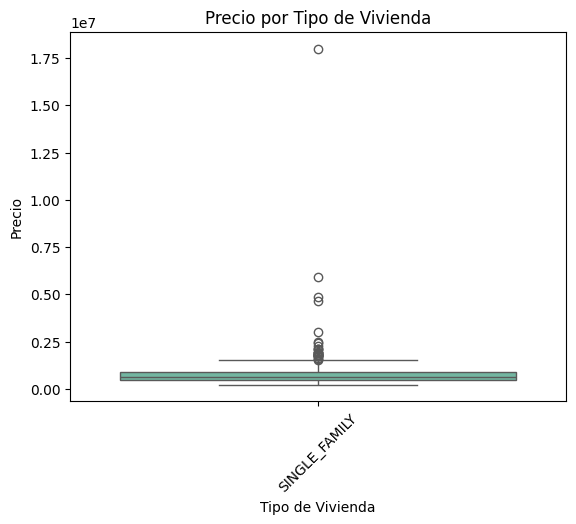

In [29]:
# Boxplot
sns.boxplot(x="Home Type", y="Price", data=filtered_df, palette="Set2")
plt.title("Precio por Tipo de Vivienda")
plt.xlabel("Tipo de Vivienda")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

*Relación entre Precio y Número de Habitaciones:*

El scatterplot nos permitirá visualizar si existe alguna correlación entre el número de habitaciones y el precio de las viviendas, y cómo esta relación puede estar influenciada por el número de baños.

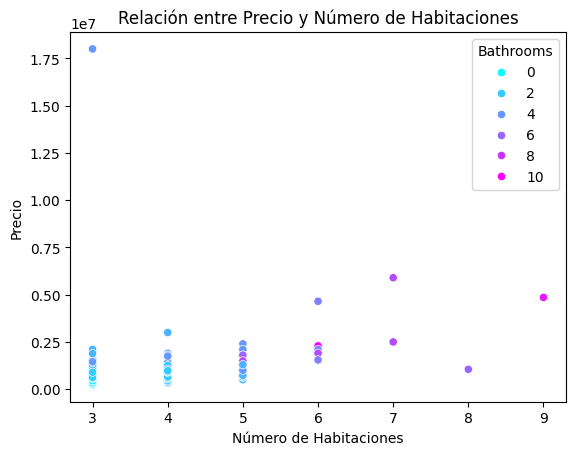

In [30]:
# Scatterplot
sns.scatterplot(x="Bedrooms", y="Price", data=filtered_df, hue="Bathrooms", palette="cool")
plt.title("Relación entre Precio y Número de Habitaciones")
plt.xlabel("Número de Habitaciones")
plt.ylabel("Precio")
plt.show()


###Detección de Valores Atípicos
En este paso, nos enfocamos en identificar valores atípicos en nuestras variables numéricas clave: el precio y el área habitable. Los valores atípicos son datos que se desvían significativamente del resto y pueden influir de manera desproporcionada en nuestros análisis y modelos.

*Detección de Outliers en Precio:*

Utilizamos un diagrama de caja para identificar valores atípicos en la variable de precio. Este gráfico nos permite visualizar la mediana, los cuartiles y detectar cualquier precio que se encuentre fuera del rango esperado.

*Detección de Outliers en Área Habitable:*

De manera similar, utilizamos un diagrama de caja para identificar valores atípicos en la variable de área habitable.

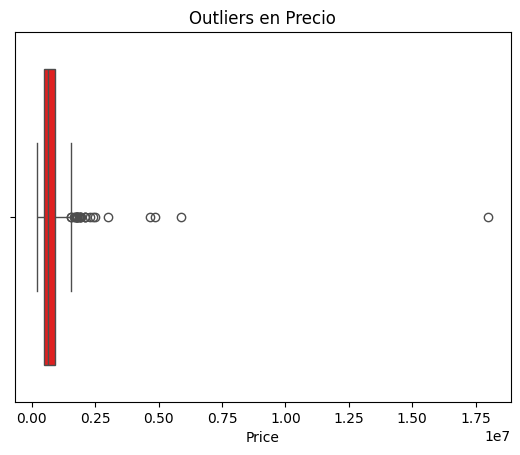

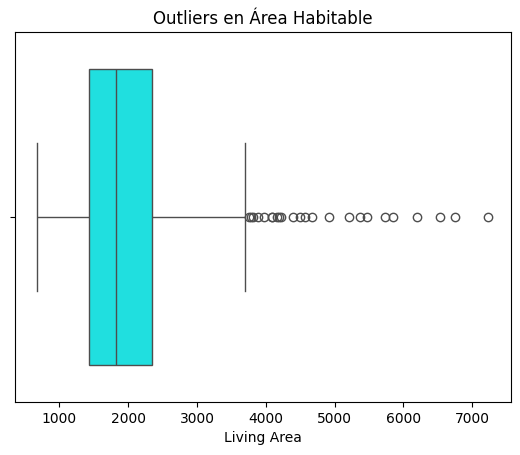

In [31]:
# Detectar outliers en Precio
sns.boxplot(x=filtered_df["Price"], color='red')
plt.title("Outliers en Precio")
plt.show()

# Detectar outliers en Área Habitable
sns.boxplot(x=filtered_df["Living Area"], color='cyan')
plt.title("Outliers en Área Habitable")
plt.show()

###Análisis de Correlaciones entre Variables Numéricas
Para identificar las relaciones entre las variables numéricas, utilizamos una matriz de correlación. La correlación es una medida que indica la intensidad y la dirección de una relación lineal entre dos variables.

*Matriz de Correlación:*

Generamos una matriz de correlación para visualizar estas relaciones y utilizamos un heatmap para representar gráficamente la fuerza de las correlaciones.

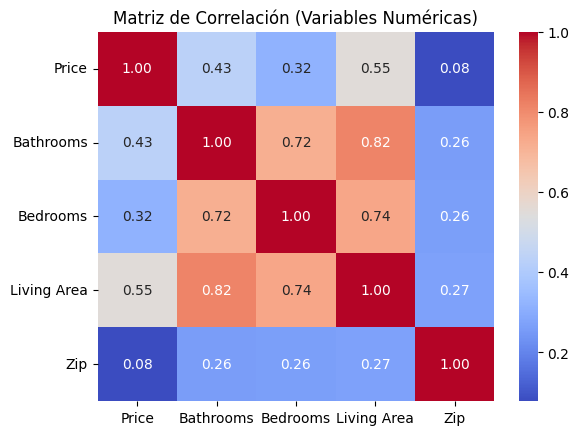

In [32]:
# Seleccionar solo las columnas numéricas
numerical_columns = filtered_df.select_dtypes(include=["number"])

# Matriz de correlación
correlation_matrix = numerical_columns.corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()


####Análisis Geográfico

*Distribución por Estado:*

En este análisis, exploramos la distribución de las propiedades en diferentes estados. Utilizamos un gráfico de barras para visualizar la frecuencia de las viviendas en cada estado representado en nuestro conjunto de datos.

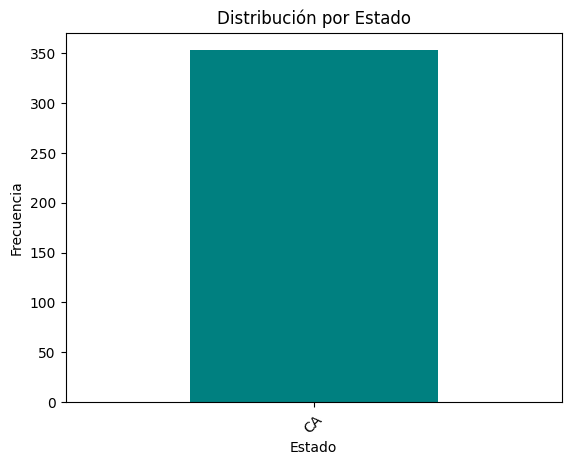

In [33]:
# Distribución de estados
filtered_df["State"].value_counts().plot(kind="bar", color="teal")
plt.title("Distribución por Estado")
plt.xlabel("Estado")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

# Implementación de Machine Learning para la Predicción de Precios de Vivienda

En esta sección, aplicaremos técnicas de machine learning para desarrollar un modelo que prediga los precios de las viviendas basándonos en las características seleccionadas. A continuación, se detalla el proceso paso a paso.

1. Preparar los Datos:

Primero, preparamos los datos dividiendo nuestro DataFrame en variables independientes (features) y la variable dependiente (target). Además, codificamos las variables categóricas para que puedan ser utilizadas en los modelos de machine learning.

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

# Filtrar las columnas relevantes
X = filtered_df[['Living Area', 'Bathrooms', 'Bedrooms']]
y = filtered_df['Price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Configuración de parametros:

Definimos una rejilla de posibles valores de hiperparámetros para el modelo de Random Forest y utilizamos GridSearchCV para encontrar la mejor combinación.

In [37]:
# Configuración de hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instancia de RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Resultados del mejor modelo
best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


3. Evaluar los Modelos:

Evaluamos los modelos utilizando el Mean Absolute Error (MAE) para medir la precisión de las predicciones.

In [38]:
# Evaluación del modelo en el conjunto de prueba
y_pred = best_rf.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred)
print(f"MAE del modelo Random Forest optimizado: {mae_rf:.2f}")

# Validación cruzada
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=5)
print(f"MAE promedio en validación cruzada: {-np.mean(cv_scores):.2f}")


MAE del modelo Random Forest optimizado: 480838.50
MAE promedio en validación cruzada: 302455.38


4. Predicción de Precios:

Implementamos una función simple para predecir el precio de una vivienda basada en las entradas del usuario.

In [41]:
def predict_price_simple():
    print("Por favor, introduce los datos de la vivienda para estimar su precio:")

    # Recolectar datos del usuario
    bathrooms = int(input("Número de baños: "))
    bedrooms = int(input("Número de habitaciones: "))
    living_area = int(input("Área habitable (en pies cuadrados): "))

    # Crear un diccionario con los datos ingresados
    input_data = {
        "Bathrooms": bathrooms,
        "Bedrooms": bedrooms,
        "Living Area": living_area,
    }

    # Convertir los datos en un DataFrame
    input_df = pd.DataFrame([input_data])

    # Asegurarse de que las columnas están en el mismo orden que durante el entrenamiento
    input_df = input_df[['Living Area', 'Bathrooms', 'Bedrooms']]  # Asegura que el orden es correcto

    # Normalizar los datos utilizando el mismo scaler usado en el entrenamiento
    input_df_scaled = scaler.transform(input_df)

    # Predicción usando el mejor modelo (best_rf)
    predicted_price = best_rf.predict(input_df_scaled)[0]
    print(f"\nEl precio estimado para la vivienda es: ${predicted_price:,.2f}")

# Llamar a la función
predict_price_simple()



Por favor, introduce los datos de la vivienda para estimar su precio:
Número de baños: 2
Número de habitaciones: 4
Área habitable (en pies cuadrados): 800

El precio estimado para la vivienda es: $523,783.09


## Conclusiones y Próximos Pasos

En este proyecto, hemos recorrido un camino exhaustivo desde la exploración inicial de los datos hasta la implementación y ajuste de modelos predictivos de machine learning. A través de un análisis detallado de las características de las viviendas y la aplicación de técnicas avanzadas de modelado, hemos sido capaces de desarrollar un modelo robusto que predice el precio de una vivienda basándose en sus características clave.

### Resultados Clave
- **Exploración de Datos**: Analizamos las características numéricas y categóricas de nuestro dataset, identificando patrones y relaciones importantes.
- **Modelado Predictivo**: Implementamos modelos de Regresión Lineal y Random Forest, y mejoramos su precisión mediante la optimización de hiperparámetros con GridSearchCV.
- **Predicción de Precios**: Nuestro modelo optimizado ahora puede estimar precios de viviendas con una precisión mejorada, proporcionando un valioso recurso para el análisis inmobiliario.

### Ejemplo de Predicción
Por favor, introduce los datos de la vivienda para estimar su precio:
- **Número de baños**: 2
- **Número de habitaciones**: 4
- **Área habitable (en pies cuadrados)**: 800

**El precio estimado para la vivienda es:** $523,783.09

## Próximos Pasos

Para seguir avanzando en este proyecto, podrías considerar las siguientes acciones:
- **Incorporar Más Datos**: Ampliar el dataset con más características o datos adicionales podría mejorar aún más la precisión del modelo.
- **Experimentar con Otros Algoritmos**: Probar otros modelos de machine learning, como XGBoost o modelos basados en deep learning.
- **Integración con Aplicaciones**: Desarrollar una aplicación web que permita a los usuarios ingresar datos y obtener predicciones en tiempo real.

Este proyecto demuestra el poder del análisis de datos y el machine learning en la predicción de precios inmobiliarios. Agradezco tu interés en este trabajo y espero que te inspire a seguir explorando y aprendiendo en el apasionante campo del análisis de datos.

## Agradecimientos

Agradezco a la comunidad de Google Colab y a todos los que han contribuido con recursos y conocimientos que hicieron posible este proyecto.

Si tienes comentarios, preguntas o simplemente quieres conectarte, no dudes en contactarme a través de mi [perfil de LinkedIn](https://www.linkedin.com/in/sergio-garc%C3%ADa-20284a291/).
